<a href="https://colab.research.google.com/github/ibader85/PredictiveAnalytics/blob/main/04_Module_4_PCA_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

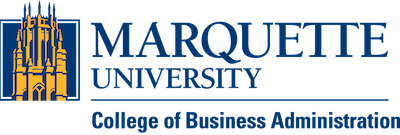

# BUAN 3065: Unlocking Business Insights with Predictive Analytics
# Module 4 PCA Exercise Using Python

Instructor: Dr. Badar Al Lawati

In [2]:
import pandas as pd

In [5]:
# Import the Health data file into a DataFrame and label it myData

myData = pd.read_excel("/content/Health.xlsx")
myData.head()

,Country Name,Death Rate,Health Expend,Life Exp,Male Mortality,Female Mortality,Population Growth,Female Pop,Male Pop,Total Pop,Labor Force,Fertility Rate,Birth Rate
0,Argentina,7.80,706.90,73.76,180.64,92.80,1.11,51.07,48.93,37057452,16458321,2.56,19.41
1,Austria,9.60,2415.78,78.13,126.29,63.09,0.24,51.47,48.53,8011566,3899156,1.36,9.80
2,Australia,6.70,1745.93,79.23,97.97,56.11,1.19,50.11,49.89,19153000,9603052,1.76,13.00
3,Brazil,5.99,262.76,70.02,247.53,125.46,1.45,50.58,49.42,175287587,79593872,2.30,20.20
4,Cambodia,9.43,17.63,58.35,292.21,226.73,2.24,51.40,48.60,12152354,5579215,3.81,28.06


In [7]:
# Exclude country names before performing
# analysis by using the drop function in Pandas

myDataNum = myData.drop("Country Name", axis = 1)

In [8]:
# standardize the variables by using the StandardScaler
# and fit_transform functions in the Scikit-Learn

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
myDataSt = StandardScaler().fit_transform(myDataNum)

In [9]:
# convert myDataSt into a data frame and restore the original
# column names using the columns attribute

myDataSt = pd.DataFrame(myDataSt, columns =
myDataNum.columns)
myDataSt.head()

,Death Rate,Health Expend,Life Exp,Male Mortality,Female Mortality,Population Growth,Female Pop,Male Pop,Total Pop,Labor Force,Fertility Rate,Birth Rate
0,-0.259747,-0.419682,0.146587,0.038817,-0.227211,0.033939,0.456981,-0.456981,-0.263818,-0.252771,0.124979,0.141308
1,0.425961,0.947604,0.681580,-0.547133,-0.571728,-0.704228,0.697831,-0.697831,-0.377429,-0.348472,-0.785414,-0.895724
2,-0.678792,0.411653,0.816246,-0.852452,-0.652668,0.101816,-0.121059,0.121059,-0.333850,-0.305009,-0.481949,-0.550407
3,-0.949266,-0.775041,-0.311279,0.759962,0.151514,0.322417,0.161940,-0.161940,0.276862,0.228322,-0.072272,0.226558
4,0.361200,-0.971171,-1.739968,1.241660,1.325839,0.992706,0.655683,-0.655683,-0.361233,-0.335670,1.073305,1.074744


In [10]:
# Use the PCA and fit functions in sklearn to perform PCA
# The PCA results are stored in a new variable called pcaResults

from sklearn.decomposition import PCA
pca = PCA()
pcaResults = pca.fit(myDataSt)

In [11]:
# review the variance in the data explained by the principal
# components, we extract the information from the
# explained_variance_ratio_ property

expVariance = pcaResults.explained_variance_ratio_

In [14]:
# present the PCA results in a tabular format, we convert the
# results into a data frame

import numpy as np
pcaSummary = pd.DataFrame({"Explained variance":
expVariance, "Cumulative variance":
np.cumsum(expVariance)})
np.round(pcaSummary, decimals = 4)

,Explained variance,Cumulative variance
0,0.4662,0.4662
1,0.2470,0.7131
2,0.1532,0.8664
3,0.0671,0.9335
4,0.0324,0.9658
5,0.0222,0.9880
6,0.0070,0.9950
7,0.0017,0.9967
8,0.0017,0.9984
9,0.0013,0.9997
